## Data Preparation For Description

In [2]:
import pandas as pd
import torch

products = ['table','cell+phone','laptop','keyboard','headphones','chair',
            'lamp','fridge','mouse','printer','tablet','television',
            'vacuum','digital+camera','speaker','iron']

df = pd.DataFrame()
for product in products:
  df_product = pd.read_csv(product+'_Text.csv')
  df_product['Label'] = df_product.shape[0] * [product]
  df = pd.concat([df,df_product])

df.columns = ['Description', 'Label']
df

,Description,Label
0,[ Item Dimensions : 13.4L x 11.5W x 22.8H inc...,table
1,[ Simple stylish design with ample storage an...,table
2,[ The minimalist design desk serves good purp...,table
3,[ Card table with vinyl playing surface mater...,table
4,"[ Simple stylish design, Functional and suita...",table
...,...,...
65,[],iron
66,[ MULTI DIRECTIONAL IRONING – The streamlined...,iron
67,[ THICKER STAINLESS STEEL TANK - All new stai...,iron
68,[ MORE POWER: Classic Steam Iron comes equipp...,iron


In [3]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.2 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=6805d981c9e656070ce3282dd502281483fe3908b39ffebac63979e3c25f07f5
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [4]:
from sentence_transformers import SentenceTransformer
tokenizer = SentenceTransformer('sentence-transformers/use-cmlm-multilingual')
#embeddings = model.encode(sentences)

.gitattributes:   0%|          | 0.00/1.22k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.85k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/804 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.89G [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.62M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/5.22M [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/sentence-transformers_use-cmlm-multilingual/ were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [5]:
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer

text = tokenizer.encode(df['Description'].tolist())

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Labels_text = label_encoder.fit_transform(df['Label'].tolist())


## Data Preparation For Image

In [6]:
from google.colab import drive
from torch import nn
import torch
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split


path = "./drive/MyDrive/PBL6_Amazon/Dataset/Data_Image"

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

Image_dataset = datasets.ImageFolder(root=path, transform=transform)


torch.Size([3, 224, 224])


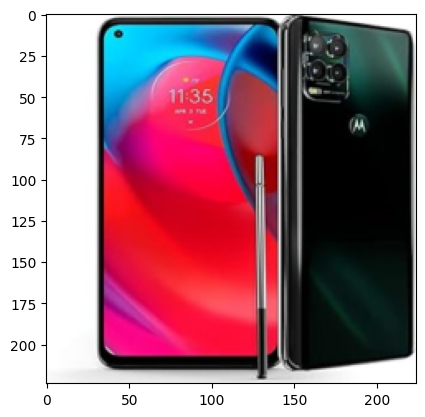

In [8]:
import matplotlib.pyplot as plt
for (X1, y1) in (Image_dataset):
  plt.imshow(X1.permute(1, 2, 0))
  print(X1.shape)
  break

In [9]:
image = []
Labels_image = []
for (X, y) in Image_dataset:
  image.append(X)
  Labels_image.append(y)

In [10]:
import numpy as np
Data_Fusion = []
#Image
image = np.array(image)
Labels_image = np.array(Labels_image)
#Text
text = np.array(text)
Labels_text = np.array(Labels_text)


for i in range(len(products)):
  for X1,y1,X2,y2 in zip(image[Labels_image==i],Labels_image[Labels_image==i],text[Labels_text==i],Labels_text[Labels_text==i]):
    Data_Fusion.append((X1,X2,i))
    print(X1.shape,X2.shape,i)


torch.Size([3, 224, 224]) (768,) 0
torch.Size([3, 224, 224]) (768,) 0
torch.Size([3, 224, 224]) (768,) 0
torch.Size([3, 224, 224]) (768,) 0
torch.Size([3, 224, 224]) (768,) 0
torch.Size([3, 224, 224]) (768,) 0
torch.Size([3, 224, 224]) (768,) 0
torch.Size([3, 224, 224]) (768,) 0
torch.Size([3, 224, 224]) (768,) 0
torch.Size([3, 224, 224]) (768,) 0
torch.Size([3, 224, 224]) (768,) 0
torch.Size([3, 224, 224]) (768,) 0
torch.Size([3, 224, 224]) (768,) 0
torch.Size([3, 224, 224]) (768,) 0
torch.Size([3, 224, 224]) (768,) 0
torch.Size([3, 224, 224]) (768,) 0
torch.Size([3, 224, 224]) (768,) 0
torch.Size([3, 224, 224]) (768,) 0
torch.Size([3, 224, 224]) (768,) 0
torch.Size([3, 224, 224]) (768,) 0
torch.Size([3, 224, 224]) (768,) 0
torch.Size([3, 224, 224]) (768,) 0
torch.Size([3, 224, 224]) (768,) 0
torch.Size([3, 224, 224]) (768,) 0
torch.Size([3, 224, 224]) (768,) 0
torch.Size([3, 224, 224]) (768,) 0
torch.Size([3, 224, 224]) (768,) 0
torch.Size([3, 224, 224]) (768,) 0
torch.Size([3, 224, 

<ipython-input-10-0c446ac3f5f3>:4: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  image = np.array(image)
<ipython-input-10-0c446ac3f5f3>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  image = np.array(image)


In [11]:
len(Data_Fusion)

1346

In [12]:
train_dataset, test_dataset = random_split(Data_Fusion, [0.7, 0.3])

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [13]:
from torchvision.models import resnet18,vgg16

model = resnet18(pretrained=True)

# for param in model.parameters():
# 	param.requires_grad = False

# modelOutputFeats = model.fc.in_features
model.fc


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 41.2MB/s]


Linear(in_features=512, out_features=1000, bias=True)

In [14]:
import torch.nn as nn

class Vision_model(nn.Module):
    def __init__(self, output_features=128):
        super(Vision_model, self).__init__()

        self.resnet18 = resnet18(pretrained=False)

        modelOutputFeats = self.resnet18.fc.in_features

        self.resnet18.fc = nn.Linear(modelOutputFeats,output_features)
    def forward(self, x):

        x = self.resnet18(x)
        return x


In [15]:
import torch.nn as nn

class Language_model(nn.Module):
    def __init__(self, input_size=768, output_features=128):
        super(Language_model, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(input_size, 256,bias=True),
            nn.ReLU(),
            nn.Linear(256, output_features,bias=True),
        )

    def forward(self, x):
        x = self.model(x)
        return x

In [16]:
import math
class MultiHeadAttention(nn.Module):
    def __init__(self,
        hidden_size: int,
        num_heads: int,
        bias: bool = True,
    ):
        super().__init__()
        assert hidden_size % num_heads == 0
        self.nh = num_heads
        self.Wqkv = nn.Linear(hidden_size, hidden_size * 3, bias=bias)
        self.Wo = nn.Linear(hidden_size, hidden_size, bias=bias)

    def forward(self, x):
        x = torch.unsqueeze(x, 1)
        B, S, C = x.shape

        x = self.Wqkv(x).reshape(B, S, 3, self.nh, C//self.nh)
        q, k, v = x.transpose(3, 1).unbind(dim=2)

        attn = q @ k.transpose(-2, -1)
        attn = attn / math.sqrt(k.size(-1))

        attn = attn.softmax(dim=-1)

        x = attn @ v

        return torch.squeeze(self.Wo(x.transpose(1, 2).reshape(B, S, C)), 1)

In [17]:
class MultiCrossAttention(nn.Module):
    def __init__(self,
        hidden_size: int,
        num_heads: int,
        bias: bool = True,
    ):
        super().__init__()
        assert hidden_size % num_heads == 0
        self.nh = num_heads
        self.Wq = nn.Linear(hidden_size, hidden_size, bias=bias)
        self.Wkv = nn.Linear(hidden_size, hidden_size * 2, bias=bias)
        self.Wo = nn.Linear(hidden_size, hidden_size, bias=bias)

    def forward(self, x, y):
        x = torch.unsqueeze(x, 1)
        B, S, C = x.shape

        q = self.Wq(x).reshape(B, S, self.nh, C//self.nh).transpose(1, 2)
        y = self.Wkv(y).reshape(B, S, 2, self.nh, C//self.nh)
        k, v = y.transpose(3, 1).unbind(dim=2)

        attn = q @ k.transpose(-2, -1)
        attn = attn / math.sqrt(k.size(-1))

        attn = attn.softmax(dim=-1)

        x = attn @ v

        return torch.squeeze(self.Wo(x.transpose(1, 2).reshape(B, S, C)), 1)

In [69]:
class PositionalEncoding(nn.Module):

    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x):
        print(x.shape,self.pe[:x.size(0), :].shape)
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)

In [75]:
class Multimodal(nn.Module):
    def __init__(self, Vision_model,Language_model,num_classes,output_features=128):
        super(Multimodal , self).__init__()
        self.vision_model = Vision_model()
        self.language_model = Language_model()

        self.multicrossattention = MultiCrossAttention(128,4)
        self.multihead = MultiHeadAttention(256,4)

        self.norm = nn.LayerNorm(256)
        self.fc = nn.Linear(output_features*2, output_features*2,bias=True)


        self.fc1 = nn.Linear(output_features*2, 128,bias=True)
        self.fc2 = nn.Linear(128, num_classes,bias=True)
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, X1, X2):
        X1 = self.vision_model(X1)
        X2 = self.language_model(X2)

        # Multi head Cross attention
        X1 = self.multicrossattention(X1,X2)
        X2 = self.multicrossattention(X2,X1)

        # Multi head attention
        x = torch.cat([X1,X2],dim=1)
        x_skip = x
        x = self.multihead(x)
        x = torch.add(x,x_skip)
        x = self.norm(x)
        x_skip = x
        x = self.fc(x)
        x = torch.add(x,x_skip)
        x = self.norm(x)


        #Feed Forward
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)

        return x

In [76]:
num_classes = len(Image_dataset.classes)
multimodal = Multimodal(Vision_model,Language_model,num_classes)


In [77]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn):
    train_loss, train_acc = 0, 0

    for batch, (X1, X2, y) in enumerate(data_loader):
        print(X1.shape, X2.shape, y.shape)
        # 1. Forward pass
        y_pred = model(X1,X2)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        print(loss,y.shape,y_pred.shape)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn):
    test_loss, test_acc = 0, 0
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for (X1, X2, y) in data_loader:
            # 1. Forward pass
            test_pred = model(X1,X2)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [78]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(multimodal.parameters(), lr=0.0001)
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [79]:
torch.manual_seed(42)

epochs = 30
for epoch in range(epochs):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_loader,
        model=multimodal,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_loader,
        model=multimodal,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )


Epoch: 0
---------
torch.Size([32, 3, 224, 224]) torch.Size([32, 768]) torch.Size([32])
tensor(2.7494, grad_fn=<NllLossBackward0>) torch.Size([32]) torch.Size([32, 16])
torch.Size([32, 3, 224, 224]) torch.Size([32, 768]) torch.Size([32])
tensor(2.7656, grad_fn=<NllLossBackward0>) torch.Size([32]) torch.Size([32, 16])
torch.Size([32, 3, 224, 224]) torch.Size([32, 768]) torch.Size([32])
tensor(2.7235, grad_fn=<NllLossBackward0>) torch.Size([32]) torch.Size([32, 16])
torch.Size([32, 3, 224, 224]) torch.Size([32, 768]) torch.Size([32])
tensor(2.6929, grad_fn=<NllLossBackward0>) torch.Size([32]) torch.Size([32, 16])
torch.Size([32, 3, 224, 224]) torch.Size([32, 768]) torch.Size([32])
tensor(2.7659, grad_fn=<NllLossBackward0>) torch.Size([32]) torch.Size([32, 16])
torch.Size([32, 3, 224, 224]) torch.Size([32, 768]) torch.Size([32])
tensor(2.7236, grad_fn=<NllLossBackward0>) torch.Size([32]) torch.Size([32, 16])
torch.Size([32, 3, 224, 224]) torch.Size([32, 768]) torch.Size([32])
tensor(2.702